In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [2]:
data  = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
import math
median_bedrooms = math.floor(data.bedrooms.median())

In [5]:
median_bedrooms

3

In [6]:
data.bedrooms.fillna(median_bedrooms)

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [7]:
x = data[['area',  'bedrooms', 'stories']]
y = data['price']

In [8]:
lr = LinearRegression()

In [9]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [10]:
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
lr.coef_

array([4.36233635e+02, 4.32544473e+05, 6.20757837e+05])

In [27]:
lr.intercept_
x_test.head()

,area,bedrooms,stories
265,2880,3,2
54,6000,3,2
171,10269,3,1
244,5320,3,2
268,4950,4,2


In [13]:
y_pred = lr.predict(x_test)

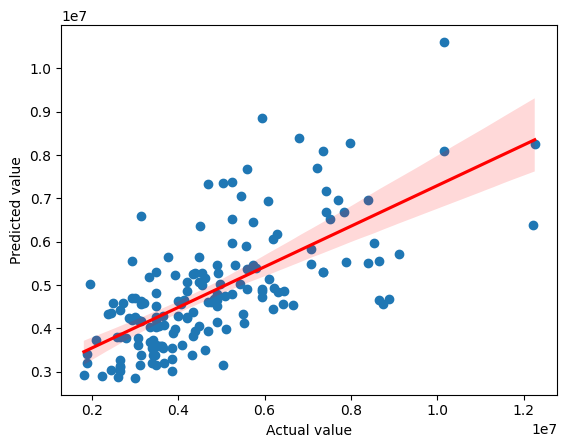

In [14]:
import seaborn as sns
plt.scatter(y_test, y_pred)
sns.regplot(x = y_test, y = y_pred,scatter = False, color = 'red')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [30]:
import pickle
with open('model_picke', 'wb') as f:
    pickle.dump(lr, f)

In [31]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [32]:
mp.predict([[8000, 4, 3]])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7217939.61048761])